# Detección de pose
 ![marcadores](pose_landmarks.png)

In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 8]    # incrementar tamaño de plots

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [2]:
def display_color_row(*imgs):
    for i, img in enumerate(imgs):
        print(type(img), img.dtype, img[0,0])
        plt.subplot(1, len(imgs), i + 1)
        plt.imshow(img)
        plt.title(f"{i}")
        plt.xticks([])
        plt.yticks([])

<class 'numpy.ndarray'> uint8 [101  61  61]
<class 'numpy.ndarray'> uint8 [101  61  61]


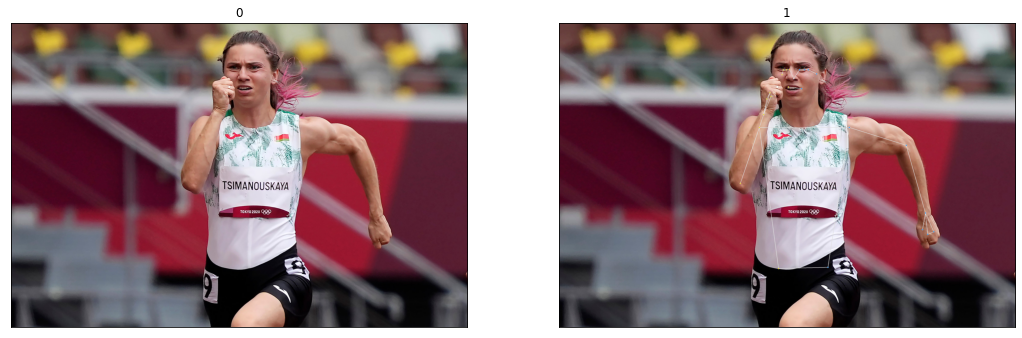

In [5]:
img = cv2.cvtColor(cv2.imread("person2.jpg"), cv2.COLOR_BGR2RGB)
# img = cv2.flip(img, 1)

with mp_pose.Pose(static_image_mode=True, model_complexity=2) as pose:
    results = pose.process(img)

    out = img.copy()
    
    mp_drawing.draw_landmarks(
      out,
      results.pose_landmarks,
      mp_pose.POSE_CONNECTIONS,
      landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
    )

display_color_row(img, out)